<a href="https://colab.research.google.com/github/GitTanish/DataAnalysis/blob/main/Wine_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Data

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/wine-quality-dataset


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('/content/WineQT.csv')  # Adjust filename if necessary

# Step 3: Explore the dataset
print(df.head())  # First few rows
print(df.info())  # Data types and missing values
print(df.describe())  # Summary statistics (mean, std, min, max, etc.)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

###Questions

#### What are the summary statistics for numeric columns?
i.	Mean, median, min, max, std<br>
ii.	Are there outliers?<br>



In [ ]:
print("Mean:\n",df.mean())
print("\nMedian\n",df.median())
print('\nmin\n',df.min())
print('\nmax\n',df.max())
print('\nstd\n',df.std())

Mean:
 fixed acidity             8.311111
volatile acidity          0.531339
citric acid               0.268364
residual sugar            2.532152
chlorides                 0.086933
free sulfur dioxide      15.615486
total sulfur dioxide     45.914698
density                   0.996730
pH                        3.311015
sulphates                 0.657708
alcohol                  10.442111
quality                   5.657043
Id                      804.969379
dtype: float64

Median
 fixed acidity             7.90000
volatile acidity          0.52000
citric acid               0.25000
residual sugar            2.20000
chlorides                 0.07900
free sulfur dioxide      13.00000
total sulfur dioxide     37.00000
density                   0.99668
pH                        3.31000
sulphates                 0.62000
alcohol                  10.20000
quality                   6.00000
Id                      794.00000
dtype: float64

min
 fixed acidity           4.60000
volatile acidity   

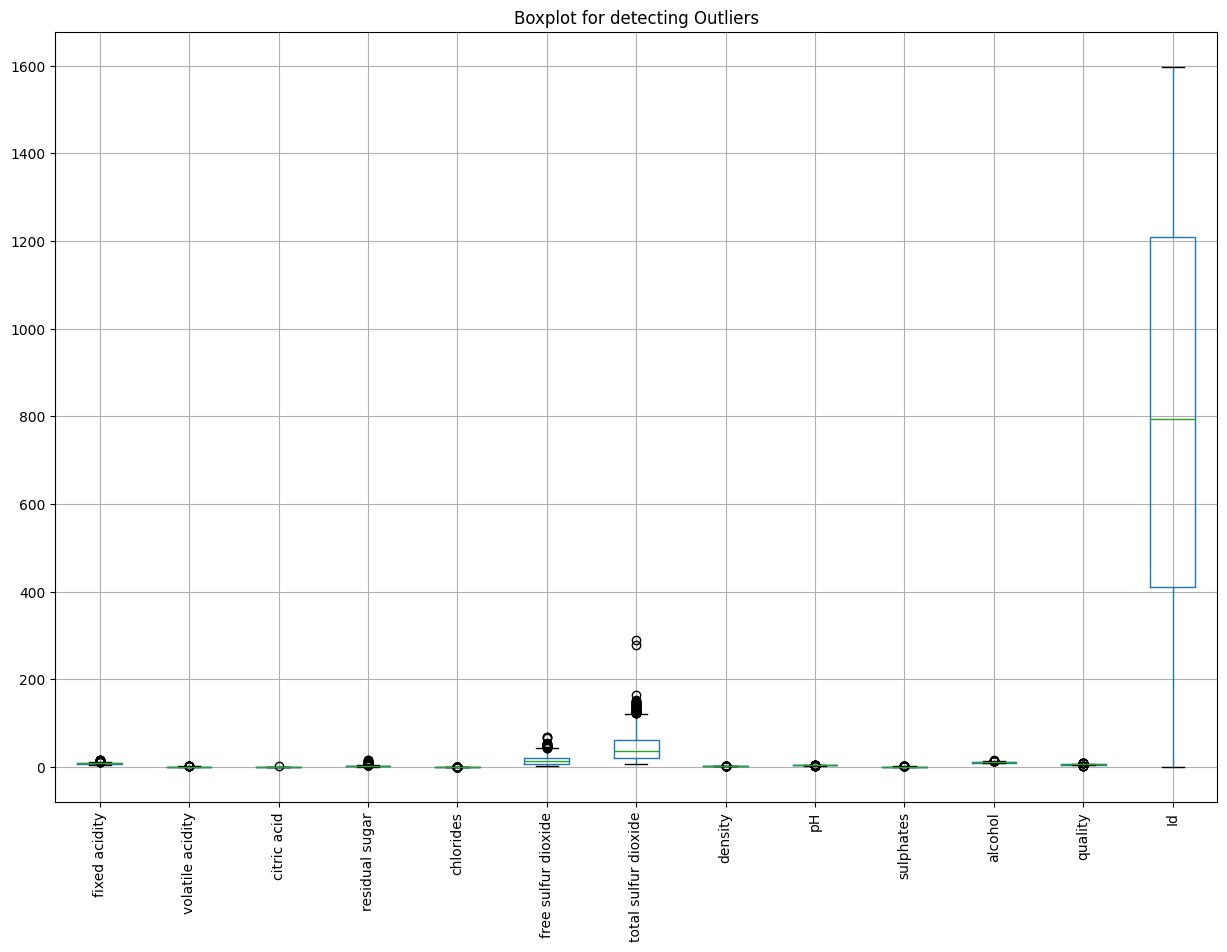

In [ ]:
plt.figure(figsize=(15,10))
df.boxplot(rot=90)
plt.title('Boxplot for detecting Outliers')
plt.show()


In [ ]:
# free sulfur dioxide and total sulfur dioxide show lots of outliers.

# residual sugar, chlorides, and sulphates have a few extreme values too.

# Other features like fixed acidity, volatile acidity, citric acid, density, pH, and alcohol look relatively clean with minor outliers.

# Id column has a huge spread — but Id is just a row number, so we can ignore it for analysis.

#### 2. How do physicochemical properties correlate with wine quality?

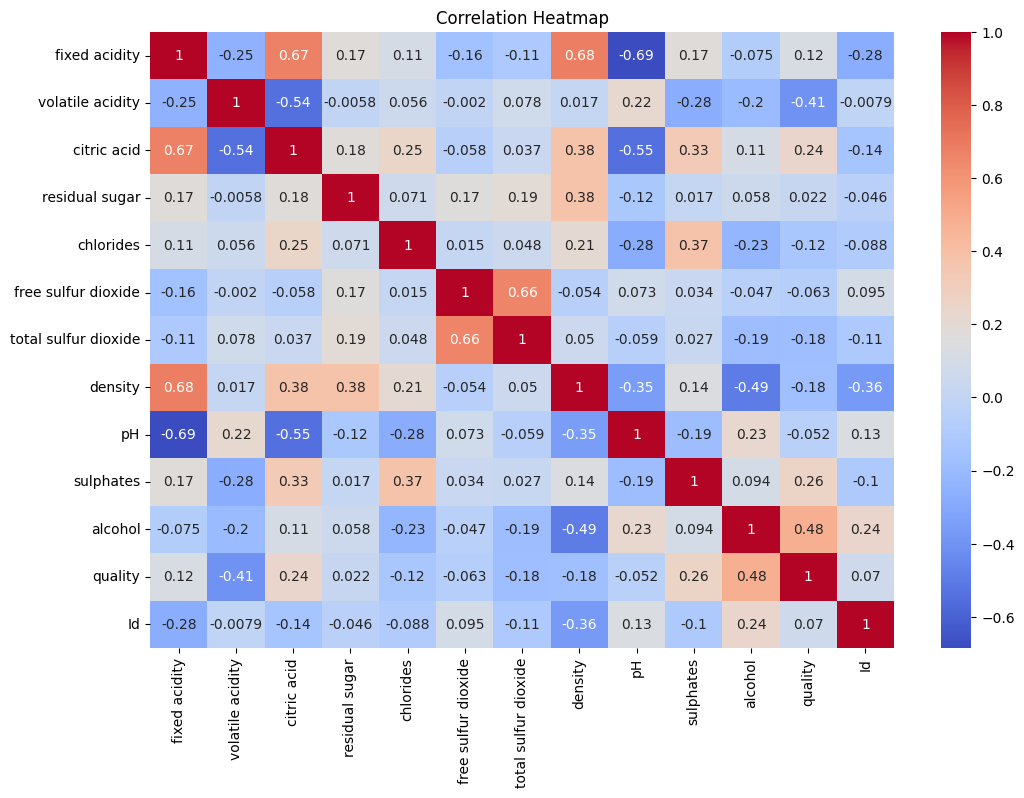

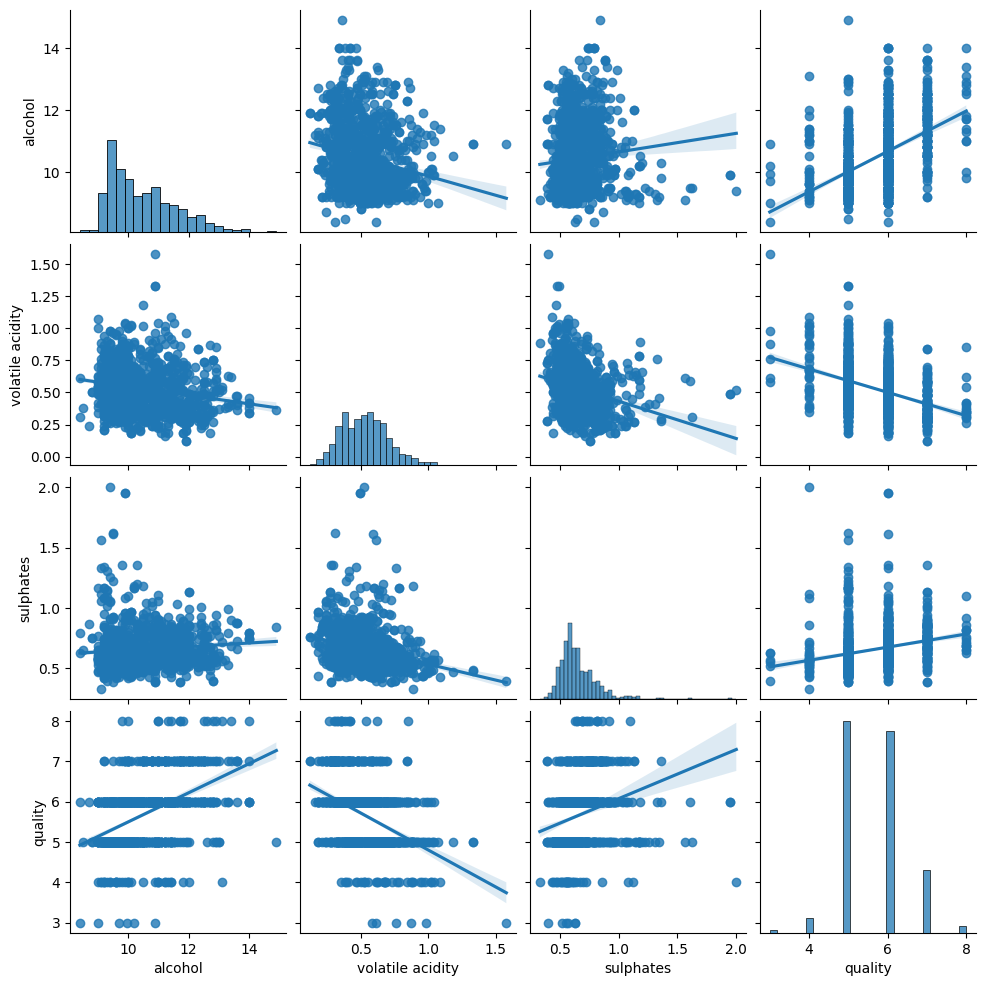

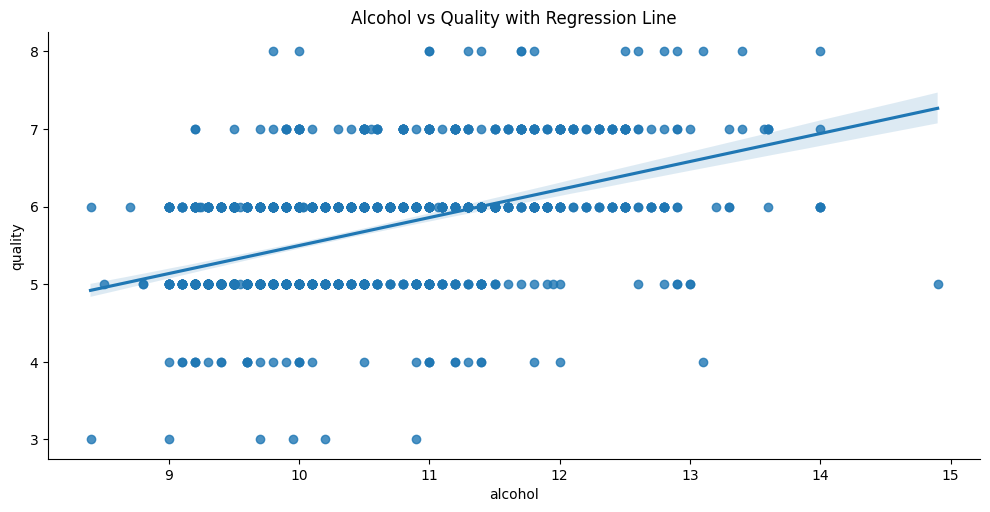

In [ ]:
# Correlation matrix
corr = df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pair plots for top correlated features with quality
top_features = corr['quality'].abs().sort_values(ascending=False)[1:4].index.tolist()
sns.pairplot(df, vars=top_features + ['quality'], kind='reg')
plt.show()

# Scatter plot: alcohol vs quality (bonus)
sns.lmplot(data=df, x='alcohol', y='quality', aspect=2)
plt.title('Alcohol vs Quality with Regression Line')
plt.show()


In [ ]:
# After the Heatmap:
# You will notice that:

# Alcohol usually has the strongest positive correlation with quality.

# Other features like sulphates and citric acid might also show a mild positive correlation.

# Volatile acidity often has a negative correlation — meaning higher volatile acidity tends to lower wine quality.

# Takeaway: Alcohol level is an important factor.
# Higher alcohol → better quality in general.

# After the Pair Plot (Top Features):
# You will see scatter plots for the top 2–3 important features vs quality.

# From the pattern:

# Alcohol vs Quality: generally an upward trend.

# Sulphates vs Quality: a weaker upward trend.

# Volatile acidity vs Quality: downward trend (higher acidity → worse quality).

# takeaway:

# Alcohol is a strong positive driver.

# Volatile acidity is a strong negative driver.

# Sulphates help, but not as strong as alcohol.

# After the Scatter Plot (Alcohol vs Quality):
# You will see a clear positive slope with a regression line.

# Wines with higher alcohol content tend to have higher quality ratings.

# Takeaway:
# If you had to predict quality using just one feature, alcohol would probably be your best bet.

# Final Simple Conclusion:
# Higher Alcohol + Moderate Sulphates + Lower Volatile Acidity → Better Wine Quality

# Physicochemical properties absolutely influence wine ratings — it’s not just random!

#### 3. What is the distribution of wine quality ratings?


<ipython-input-15-2e50561fa1b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='muted')


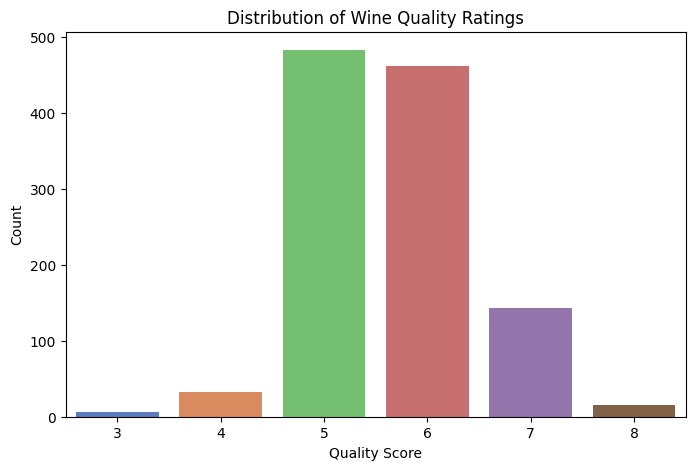

In [ ]:
# Bar plot / Histogram
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, palette='muted')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

####4. Which features differ most between low- and high-quality wines?

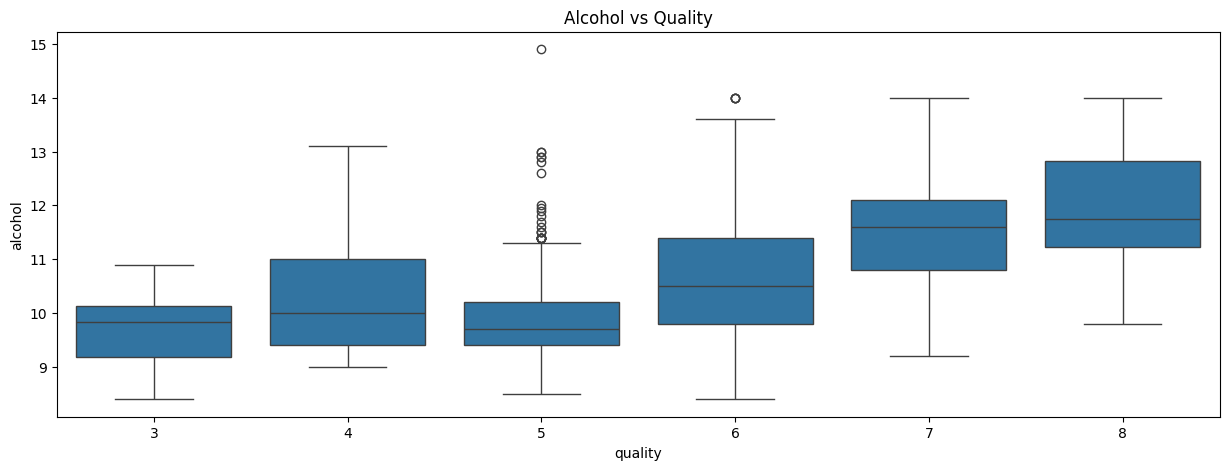

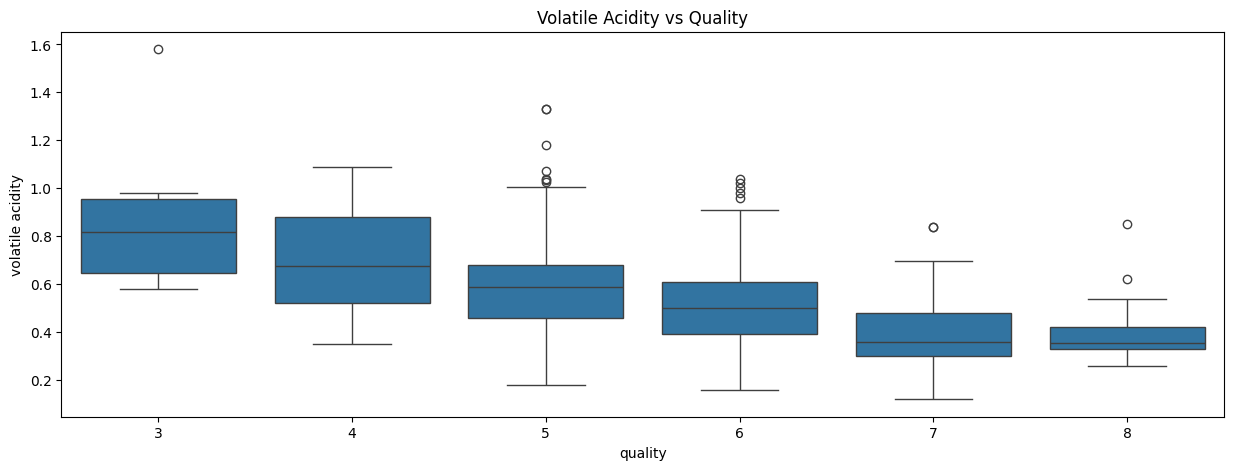

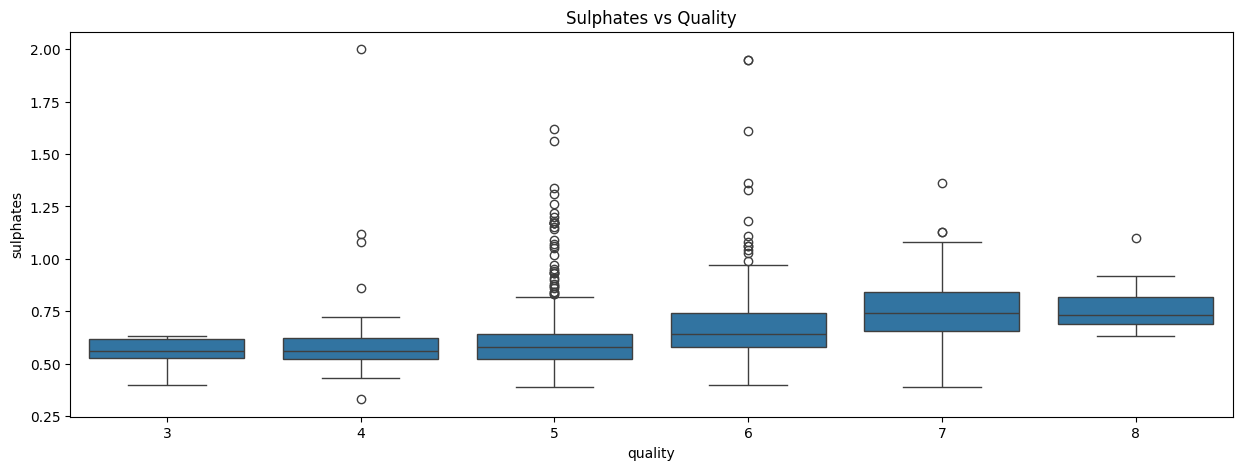

In [ ]:
# First, select only a few important features
selected_features = ['alcohol', 'volatile acidity', 'sulphates']

# Make boxplots for selected features
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='quality', y='alcohol')
plt.title('Alcohol vs Quality')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='quality', y='volatile acidity')
plt.title('Volatile Acidity vs Quality')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='quality', y='sulphates')
plt.title('Sulphates vs Quality')
plt.show()


####5. What is the range of pH values in the wines?

pH range: 2.74 to 4.01


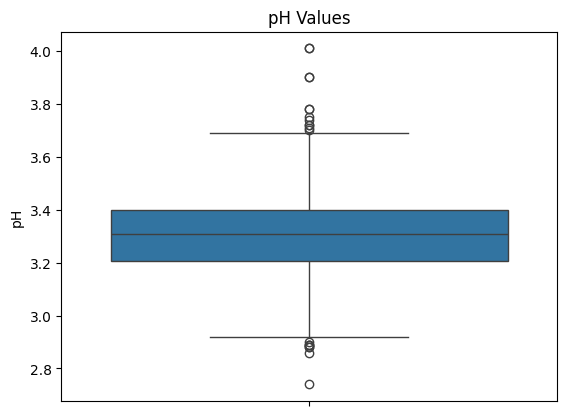

In [ ]:
print("pH range:", df['pH'].min(), "to", df['pH'].max())

sns.boxplot(y=df['pH'])
plt.title('pH Values')
plt.show()
